## Final Project Submission

Please fill out:
* Student name: Lucas Fishbein
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Introduction


# Define database columns names

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

# Data Exploration and Understanding

In [1]:
#Importing utalized Python Packages

import pandas as pd #Allows access to csv data file as well as manipulations 
import matplotlib.pyplot as plt #Creates Data visualizations
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # import library for train test split
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_goldfeldquandt
%matplotlib inline

In [2]:
#Accessing CSV datafile stored in /data folder of repository as DataFrame

kc_data = pd.read_csv( 'data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
#Exploring dataset column datatypes
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
#Exploring the values associated within various columns for understanding as well as checking for placeholder of coded values

#kc_data['waterfront'].value_counts()
#kc_data['greenbelt'].value_counts()
#kc_data['nuisance'].value_counts()
kc_data['grade'].value_counts()
#kc_data['condition'].value_counts()
#kc_data['view'].value_counts()
#kc_data['heat_source'].value_counts()
#kc_data['sewer_system'].value_counts()
#kc_data['sqft_patio'].value_counts()
#kc_data['floors'].value_counts()
#kc_data['price'].sort_values()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

## Data Cleaning

The first step taken was to check the dataset for duplicate values, the id column is a unique identifier so checking this column should be sufficient.

In [5]:
#Checking for and then removing duplicate entries

#Checking for duplicate entries via id column
kc_data[kc_data['id'].isin(kc_data['id'][kc_data['id'].duplicated()])].sort_values("id")

#One duplicate was found and has been removed
kc_data.drop_duplicates(subset=['id'], inplace=True)

Next each column is checked for the percentage of null values present

In [6]:
#Checking data for missing values
for col in kc_data.columns:
    percent_of_nulls = (sum(kc_data[col].isnull())/len(kc_data[col])) * 100 
    print(col, percent_of_nulls)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
greenbelt 0.0
nuisance 0.0
view 0.0
condition 0.0
grade 0.0
heat_source 0.10612190754128806
sewer_system 0.04642833454931353
sqft_above 0.0
sqft_basement 0.0
sqft_garage 0.0
sqft_patio 0.0
yr_built 0.0
yr_renovated 0.0
address 0.0
lat 0.0
long 0.0


The heat_source column is missing 10.6% of its data points and the sewer_system is missing 4.6%, these are the only columns with null values. 

These columns are not planned to be used in the data analysis and will likely be removed, if they are used, these null values will be dealt with properly

In [7]:
kc_data['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3805
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [8]:
#Altering grade values to remove string and leave column as numeric value

kc_data['grade'] = kc_data['grade'].str.split(' ', 1, expand=True)
kc_data['grade'] = kc_data['grade'].astype(int)


In [9]:
# Replace coded words of condition variable to numeric value
kc_data['condition'].replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3,'Very Good': 4}, inplace=True)
kc_data['condition'] = kc_data['condition'].astype(int)

## Converting Boolean Categorical Variables to 0-1 Numerical coding 
 

In [10]:
#Converting waterfront, greenbelt and nuisance features from 'NO' or 'YES' to - or 1

for col in ['waterfront', 'greenbelt', 'nuisance']:
    kc_data[col].replace({'NO': 0, 'YES': 1}, inplace=True)

# Removing irrelevant variables

Based on the question at hand it can be predetermined that some of the features of our dataset will not be utalized and therefore can be removed in order to simplify our dataframe. We do not care about the location of these homes as the specified dataset already created the our subset by location nor do we care about local utilities or the date sold. All of these columns will be dropped from from our working dataframe.

In [11]:
#Dropping features that will not be useful in this analysis

kc_data.drop(columns=['id','date','sqft_basement',
                      'yr_renovated','address','lat','long',
                      'sewer_system','heat_source', 'yr_built'], inplace=True)


In [12]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30154 entries, 0 to 30154
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30154 non-null  float64
 1   bedrooms     30154 non-null  int64  
 2   bathrooms    30154 non-null  float64
 3   sqft_living  30154 non-null  int64  
 4   sqft_lot     30154 non-null  int64  
 5   floors       30154 non-null  float64
 6   waterfront   30154 non-null  int64  
 7   greenbelt    30154 non-null  int64  
 8   nuisance     30154 non-null  int64  
 9   view         30154 non-null  object 
 10  condition    30154 non-null  int64  
 11  grade        30154 non-null  int64  
 12  sqft_above   30154 non-null  int64  
 13  sqft_garage  30154 non-null  int64  
 14  sqft_patio   30154 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 3.7+ MB


All remaining features have been converted into numerical values except the view feature which has multiple categorical values possible, this variable will be one hot encoded in order to view its correlation values with price.

## Defining Variable types

#### Numeric Variables:

    Continuous = price, all sqft values, lat, long
    Discrete = bedrooms, bathrooms, floors, yr_built, yr_renovated

#### Categorical variables:

Strings:

    Boolean: waterfront, greenbelt, nuisance
    Non-Boolean: grade, condition, view, heat_source, sewer_system, address (Will Need Dummy Variables)
    
Discrete = id


In [13]:
abs(kc_data.corr()['price']).sort_values(ascending=False)

price          1.000000
sqft_living    0.608491
grade          0.565237
sqft_above     0.538634
bathrooms      0.480347
sqft_patio     0.313407
bedrooms       0.289241
sqft_garage    0.264150
waterfront     0.232268
floors         0.180542
sqft_lot       0.085742
greenbelt      0.068268
nuisance       0.011573
condition      0.008668
Name: price, dtype: float64

Based on the dataset provided the features that have the highest correlation values with the price of a home are at sqft_living at ~%61, grade at ~57%, sqft_above at ~54% and number of bathrooms as ~498%.

These are moderate levels of correlation and in an attempt to find other factors with high correlation, a number of features will be engineered from the dataset and then tested for their correlation values with price in order to obtain the best predictor values we can.

## Engineering Data Features 



In [14]:
#Creating Columns for the presence of either a patio or a garage.

def add_has_garage_col(row):
        if row['sqft_garage'] > 0:
            return 1
        else:
            return 0
        
kc_data['has_garage'] = kc_data.apply(lambda row: add_has_garage_col(row), axis=1)

#Adding has patio boolean column

def add_has_patio_col(row):
        if row['sqft_patio'] > 0:
            return 1
        else:
            return 0
    
kc_data['has_patio'] = kc_data.apply(lambda row: add_has_patio_col(row), axis=1)


In [15]:
#Creating a Price per sqft feature based on the square footage of living space in the home

kc_data['price_per_sqft'] = kc_data['price'] / kc_data['sqft_living']
kc_data['price_per_sqft'].describe()

count     30154.000000
mean        561.503477
std        3486.490876
min           6.920415
25%         360.655738
50%         492.120135
75%         644.430955
max      601000.000000
Name: price_per_sqft, dtype: float64

Looks like there is a potential that the price per sqft metric has some outliers when the 75th percentile is $644$ dollars per sqft and the max value is $601,000$ dollars per sqft

In [16]:
#Checking the top and bottom values of the price per sqft feature for possible outliers
kc_data['price_per_sqft'].sort_values()


6430          6.920415
25830         7.117730
9125         11.695703
21793        11.880603
4487         13.895640
             ...      
6125      10000.000000
23470     15073.529412
9516      15584.158416
5811      48103.448276
14977    601000.000000
Name: price_per_sqft, Length: 30154, dtype: float64

Upon a closer look at the engineered price_per_sqft feature it appears very likely that there are significant outliers within this metric, the outliers in this feature as well as other features will be dealt with in prior to our regression to create a more general training set.

## Checking data for potential outliers in numeric variables

In [17]:
#Looking at overall dataset for possible outliers
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_garage,sqft_patio,has_garage,has_patio,price_per_sqft
count,3.015400e+04,30154.000000,30154.000000,30154.000000,3.015400e+04,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000
mean,1.108486e+06,3.413544,2.334682,2112.378723,1.672387e+04,1.543477,0.017212,0.025635,0.174504,2.471314,7.651323,1809.800226,330.205512,217.409631,0.668071,0.775817,561.503477
std,8.963594e+05,0.981626,0.889519,974.027692,6.038359e+04,0.567720,0.130061,0.158047,0.379549,0.702523,1.148971,878.309204,285.773602,245.306504,0.470914,0.417050,3486.490876
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.920415
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1180.000000,0.000000,40.000000,0.000000,1.000000,360.655738
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,0.000000,0.000000,0.000000,2.000000,8.000000,1560.000000,400.000000,150.000000,1.000000,1.000000,492.120135
75%,1.300000e+06,4.000000,3.000000,2618.750000,1.057900e+04,2.000000,0.000000,0.000000,0.000000,3.000000,8.000000,2270.000000,510.000000,320.000000,1.000000,1.000000,644.430955
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,1.000000,1.000000,4.000000,13.000000,12660.000000,3580.000000,4370.000000,1.000000,1.000000,601000.000000


Looking at the description stats for this database a number of numeric values have a large descrepancy between the 75% percentile value and the max value, such as price and sqft_living. We will calculate acceptable outlier values from these metrics by calculating the interquartile range. Once the interquartile range is found, the outlier cutoffs will be calculated using the 25th and 75th percentile values the following formulas:
> Lower Limit: q25 - 1.5 * IQR\
Upper Limit: q75 + 1.5 * IQR

In [18]:
#creating a list of variables to check for outliers
kc_outliers = ['price', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot',
                       'price_per_sqft','sqft_patio','sqft_garage',
                      'sqft_above']

In [19]:
#Calculating outlier cutoff values using interquartile range

upper_dic={}
for column in kc_outliers:
    q100,q75, q25 = np.percentile(kc_data[column],[100,75, 25]) 
    iqr = q75-q25
    iqr
    
    lower_limit = q25 - 1.5 * iqr
    upper_limit = q75 + 1.5 * iqr
    
    #Storing each varuables 75th perctile as its own variable in a list
    upper_dic[str(column)] = q75 + 1.5 * iqr
    
    print(('The 75th percentile of', column,'is', q75, 'max value is',q100))
    print('The', column,'25th percentile is', lower_limit)
    print('The', column,'75th percentile is', upper_limit)
    print('The number of homes that are above the 75th percentile are', sum(kc_data[column] >= upper_limit))
    print()

('The 75th percentile of', 'price', 'is', 1300000.0, 'max value is', 30750000.0)
The price 25th percentile is -330000.0
The price 75th percentile is 2278000.0
The number of homes that are above the 75th percentile are 1993

('The 75th percentile of', 'bedrooms', 'is', 4.0, 'max value is', 13.0)
The bedrooms 25th percentile is 1.5
The bedrooms 75th percentile is 5.5
The number of homes that are above the 75th percentile are 635

('The 75th percentile of', 'bathrooms', 'is', 3.0, 'max value is', 10.5)
The bathrooms 25th percentile is 0.5
The bathrooms 75th percentile is 4.5
The number of homes that are above the 75th percentile are 883

('The 75th percentile of', 'sqft_living', 'is', 2618.75, 'max value is', 15360.0)
The sqft_living 25th percentile is -378.125
The sqft_living 75th percentile is 4416.875
The number of homes that are above the 75th percentile are 734

('The 75th percentile of', 'sqft_lot', 'is', 10579.0, 'max value is', 3253932.0)
The sqft_lot 25th percentile is -3743.5
Th

In [20]:
#Checking created refernce dictionary for upper outlier cut-offs

upper_keys  = list(upper_dic.keys())
upper_dic

{'price': 2278000.0,
 'bedrooms': 5.5,
 'bathrooms': 4.5,
 'sqft_living': 4416.875,
 'sqft_lot': 19172.5,
 'price_per_sqft': 1070.0937821349116,
 'sqft_patio': 740.0,
 'sqft_garage': 1275.0,
 'sqft_above': 3905.0}

In [21]:
#Applying outlier cut offs to each applicable column to create a more generalized dataset

data_no_outliers = kc_data.copy()
# for key in upper_keys:
#     data_no_outliers = data_no_outliers[data_no_outliers[key] < upper_dic[key]]

data_no_outliers = data_no_outliers[data_no_outliers['price'] < 4000000.0]
data_no_outliers = data_no_outliers[data_no_outliers['price_per_sqft'] < 1070.0937821349116]
data_no_outliers = data_no_outliers[data_no_outliers['grade'] <= 11 ]
data_no_outliers = data_no_outliers[data_no_outliers['bedrooms'] <= 6 ]
data_no_outliers = data_no_outliers[data_no_outliers['bathrooms'] <= 4 ]


data_no_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_garage,sqft_patio,has_garage,has_patio,price_per_sqft
count,2.828900e+04,28289.000000,28289.000000,28289.000000,2.828900e+04,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000,28289.000000
mean,9.919644e+05,3.373219,2.264361,2035.887023,1.554598e+04,1.535862,0.011736,0.024921,0.169889,2.481601,7.586694,1745.380042,323.366892,208.160981,0.669200,0.772562,501.264922
std,5.396799e+05,0.897133,0.753567,814.620209,5.082593e+04,0.566925,0.107697,0.155888,0.375542,0.705171,1.036618,758.282632,274.927013,230.851168,0.470509,0.419185,188.953742
min,2.736000e+04,0.000000,0.000000,340.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,0.000000,0.000000,0.000000,7.117730
25%,6.338880e+05,3.000000,2.000000,1420.000000,4.792000e+03,1.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1180.000000,0.000000,40.000000,0.000000,1.000000,355.555556
50%,8.350000e+05,3.000000,2.500000,1900.000000,7.353000e+03,1.500000,0.000000,0.000000,0.000000,2.000000,7.000000,1540.000000,390.000000,140.000000,1.000000,1.000000,481.481481
75%,1.220000e+06,4.000000,2.500000,2530.000000,1.027400e+04,2.000000,0.000000,0.000000,0.000000,3.000000,8.000000,2190.000000,500.000000,300.000000,1.000000,1.000000,624.460432
max,3.998000e+06,6.000000,4.000000,7820.000000,2.657160e+06,4.000000,1.000000,1.000000,1.000000,4.000000,11.000000,6245.000000,3580.000000,4370.000000,1.000000,1.000000,1069.893617


In [22]:
#how many rows were lost by removing potential outliers
len(kc_data) - len(data_no_outliers)

1865

In [23]:
#Resetting index after rows were dropped, prior to splitting df to deal with categorical and numeric variables
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_garage,sqft_patio,has_garage,has_patio,price_per_sqft
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,NONE,3,7,1180,0,40,0,1,572.033898
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,AVERAGE,2,7,1570,0,240,0,1,332.129964
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,AVERAGE,2,7,1580,0,0,0,0,107.986111
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,AVERAGE,2,9,1090,200,270,1,1,358.796296
4,592500.0,2,2.0,1120,758,2.0,0,0,1,NONE,2,7,1120,550,30,1,1,529.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28284,1555000.0,5,2.0,1910,4000,1.5,0,0,0,NONE,3,8,1600,0,210,0,1,814.136126
28285,1313000.0,3,2.0,2020,5800,2.0,0,0,0,FAIR,2,7,2020,0,520,0,1,650.000000
28286,800000.0,3,2.0,1620,3600,1.0,0,0,1,NONE,2,7,940,240,110,1,1,493.827160
28287,775000.0,3,2.5,2570,2889,2.0,0,0,0,NONE,2,8,1830,480,100,1,1,301.556420


## Scaling Numeric Variables

All of our Numeric variables are in different units and scales, some are in square ft, others are dollar amounts, along with variables such as the bathrooms that simply counted the number of bathrooms present. Before comparing and analyzing this data all of the numeric values are going to set to a standard scale by centering the data about the mean and then dividing by the standard deviation, otherwise known as being converted to z-scores. This is done in one step using sklearn's StandardScaler function.

In [24]:
#Getting the names of all number type columns
num_cols = data_no_outliers.select_dtypes(include=np.number).columns
#creating a numeric variable only df
kc_nums = data_no_outliers[num_cols].copy()

#removing has_garage and has_patio column as these are numeric in value but categoric in nature
kc_nums.drop(columns=['has_garage','has_patio','greenbelt','waterfront','nuisance'], inplace=True)


In [25]:
#Scaling data using StandardScaler as described above

#kc_nums_scaler = StandardScaler().fit(kc_nums)
#kc_nums_scaled = pd.DataFrame(kc_nums_scaler.transform(kc_nums), columns=kc_nums.columns)

kc_nums_scaled = kc_nums

In [26]:
#Adding back has_garage and has_patio columns
kc_nums_scaled['has_garage'] = data_no_outliers['has_garage']
kc_nums_scaled['has_patio'] = data_no_outliers['has_patio']
kc_nums_scaled['greenbelt'] = data_no_outliers['greenbelt']
kc_nums_scaled['waterfront'] = data_no_outliers['waterfront']
kc_nums_scaled['nuisance'] = data_no_outliers['nuisance']
kc_nums_scaled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_garage,sqft_patio,price_per_sqft,has_garage,has_patio,greenbelt,waterfront,nuisance
0,675000.0,4,1.0,1180,7140,1.0,3,7,1180,0,40,572.033898,0,1,0,0,0
1,920000.0,5,2.5,2770,6703,1.0,2,7,1570,0,240,332.129964,0,1,0,0,1
2,311000.0,6,2.0,2880,6156,1.0,2,7,1580,0,0,107.986111,0,0,0,0,0
3,775000.0,3,3.0,2160,1400,2.0,2,9,1090,200,270,358.796296,1,1,0,0,0
4,592500.0,2,2.0,1120,758,2.0,2,7,1120,550,30,529.017857,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28284,1555000.0,5,2.0,1910,4000,1.5,3,8,1600,0,210,814.136126,0,1,0,0,0
28285,1313000.0,3,2.0,2020,5800,2.0,2,7,2020,0,520,650.000000,0,1,0,0,0
28286,800000.0,3,2.0,1620,3600,1.0,2,7,940,240,110,493.827160,1,1,0,0,1
28287,775000.0,3,2.5,2570,2889,2.0,2,8,1830,480,100,301.556420,1,1,0,0,0


# One Hot Encoding Categorical Variables

The remaining non-numeric categorical variables will be One Hot Encoded to create a column for each condition value.  To avoid colinearity issues one condition value column for each variable will be dropped and this will act the reference values when these variables are analyzed via linear regression

In [27]:
#One Hot Encoding all Categorical Variables

ohe = OneHotEncoder(sparse=False)
#Selecting Categorical Variables for analysis
kc_cats = data_no_outliers[['view']].copy()

#Completeing OneHotEncoding in order to use categorical variables in regression

kc_cats_ohe = pd.DataFrame(
    data=ohe.fit_transform(kc_cats),
    index = data_no_outliers.index,
    columns=ohe.get_feature_names([ 'view']))

#Dropping columns that will be used as reference columns for each OneHotEncoded variable
kc_cats_ohe.drop(['view_NONE'], axis=1, inplace=True)

kc_cats_ohe

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
28284,0.0,0.0,0.0,0.0
28285,0.0,0.0,1.0,0.0
28286,0.0,0.0,0.0,0.0
28287,0.0,0.0,0.0,0.0


One Hot Encoded Dropped Columns that will act as references for regression:


    view : NONE

 

## Recombining Scaled Numeric and One Hot Encoded categorical variables

In [28]:
#Concating One Hot encoded variables with Numeric Variables to create a working dataset

kc_working_data = pd.concat([kc_nums_scaled, kc_cats_ohe], axis=1)


In [29]:
#Checking to make sure concatanation was aligned properly
nan_count = kc_working_data.isna().sum()
print(nan_count) 

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
condition         0
grade             0
sqft_above        0
sqft_garage       0
sqft_patio        0
price_per_sqft    0
has_garage        0
has_patio         0
greenbelt         0
waterfront        0
nuisance          0
view_AVERAGE      0
view_EXCELLENT    0
view_FAIR         0
view_GOOD         0
dtype: int64


# Identifying Muliticolinear Between Features

<AxesSubplot:>

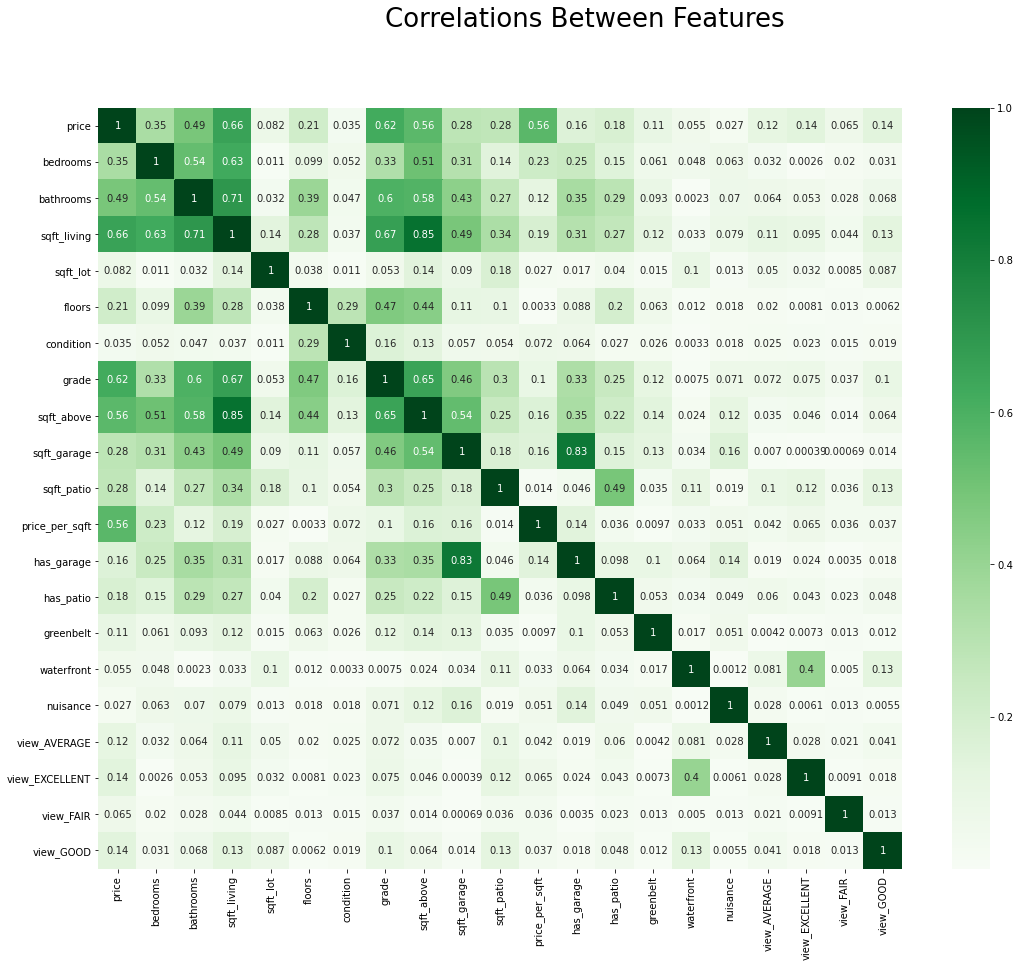

In [30]:

fig, ax = plt.subplots(figsize=(18,14))
fig.suptitle('Correlations Between Features', fontsize=26)
sns.heatmap(abs(kc_working_data.corr().abs()), cmap='Greens', annot=True)

In [31]:
#Identifying factor pairs with high coliearity in order to remove one from our analysis

corr_df = kc_working_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace=True)

corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

corr_df.columns = ['coor']

corr_df.drop_duplicates(inplace=True)

corr_df[(corr_df.coor>.75) & (corr_df.coor<1)] 

,coor
pairs,
"(sqft_living, sqft_above)",0.854990
"(sqft_garage, has_garage)",0.826972


Two pairs of features have a correlation value higher than 75%, sqft_garage with has_garage and sqft_living with sqft_above. Because these two pairs have a very high coorlation with eachother, one feature from each pair must be dropped prior to our regression in order to avoid multicollinearity of features. The feature with the lower correlation to price in each pair will be dropped to assure no colinearity is present.

# Identifying Factors most Highly Correlated to Home Price



In [32]:
abs(kc_working_data.corr()["price"]).sort_values(ascending=False) 

price             1.000000
sqft_living       0.656401
grade             0.622050
price_per_sqft    0.563235
sqft_above        0.559859
bathrooms         0.485034
bedrooms          0.345919
sqft_garage       0.282452
sqft_patio        0.276154
floors            0.212795
has_patio         0.182743
has_garage        0.157801
view_EXCELLENT    0.137913
view_GOOD         0.137212
view_AVERAGE      0.115438
greenbelt         0.105498
sqft_lot          0.081675
view_FAIR         0.064568
waterfront        0.054819
condition         0.034941
nuisance          0.027112
Name: price, dtype: float64

sqft_above and has_garage will be dropped as these have the lower coorlation with price when compared to the feature they were found to be colinear with above.

In [33]:
#Dropping sqft_living as it was found to be colinear with two other factors
kc_working_data.drop(columns=['sqft_above','has_garage'], inplace=True)


While none of the features have very high correlation values with price there a few with moderate correlations the hopefully when combined will create a strong regression model for . The features we will consider are:

    sqft_living
    price_per_sqft             
    grade 
    bathrooms
    bedrooms
    
                                  

In [34]:
kc_regression_data = kc_working_data.copy()
kc_regression_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_garage,sqft_patio,price_per_sqft,has_patio,greenbelt,waterfront,nuisance,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,675000.0,4,1.0,1180,7140,1.0,3,7,0,40,572.033898,1,0,0,0,0.0,0.0,0.0,0.0
1,920000.0,5,2.5,2770,6703,1.0,2,7,0,240,332.129964,1,0,0,1,1.0,0.0,0.0,0.0
2,311000.0,6,2.0,2880,6156,1.0,2,7,0,0,107.986111,0,0,0,0,1.0,0.0,0.0,0.0
3,775000.0,3,3.0,2160,1400,2.0,2,9,200,270,358.796296,1,0,0,0,1.0,0.0,0.0,0.0
4,592500.0,2,2.0,1120,758,2.0,2,7,550,30,529.017857,1,0,0,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28284,1555000.0,5,2.0,1910,4000,1.5,3,8,0,210,814.136126,1,0,0,0,0.0,0.0,0.0,0.0
28285,1313000.0,3,2.0,2020,5800,2.0,2,7,0,520,650.000000,1,0,0,0,0.0,0.0,1.0,0.0
28286,800000.0,3,2.0,1620,3600,1.0,2,7,240,110,493.827160,1,0,0,1,0.0,0.0,0.0,0.0
28287,775000.0,3,2.5,2570,2889,2.0,2,8,480,100,301.556420,1,0,0,0,0.0,0.0,0.0,0.0


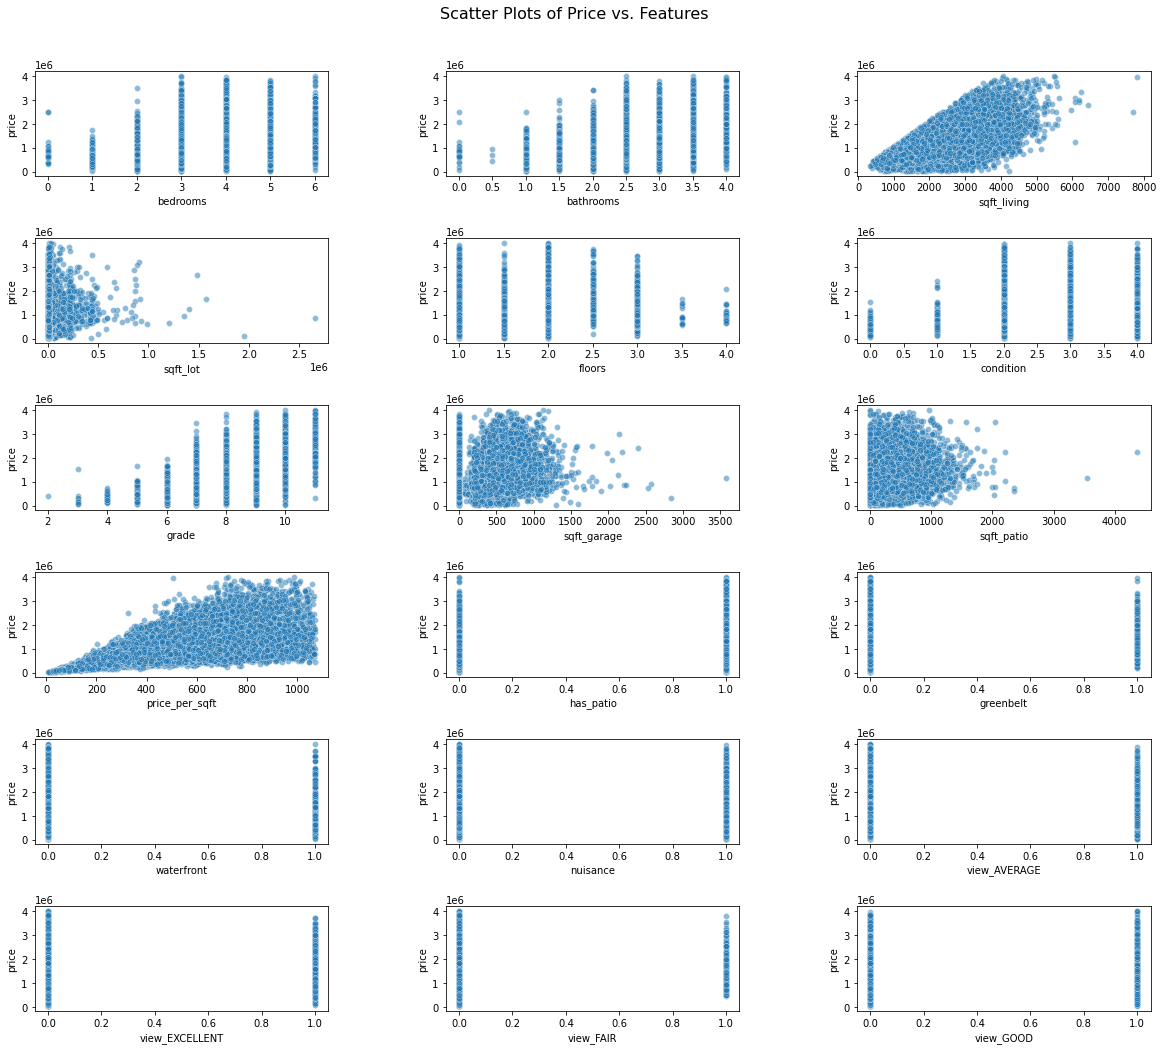

In [35]:
fig,ax = plt.subplots(figsize=(20,18), ncols=3, nrows=6)
fig.subplots_adjust(top=0.85)
fig.suptitle('Scatter Plots of Price vs. Features', y=0.9, fontsize=16)
cols = list(kc_regression_data.drop(['price'],axis=1).columns)
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)
for i,c in enumerate(cols):
    sns.scatterplot(x=c, y='price', ci=None, data=kc_regression_data, ax=ax[i//3][i%3], alpha=0.5)  
    
    

The features that seem to have linear or somewhat linear relationships with price are Bathrooms, sqft_living, grade and price_per_sqft

<Figure size 432x288 with 0 Axes>

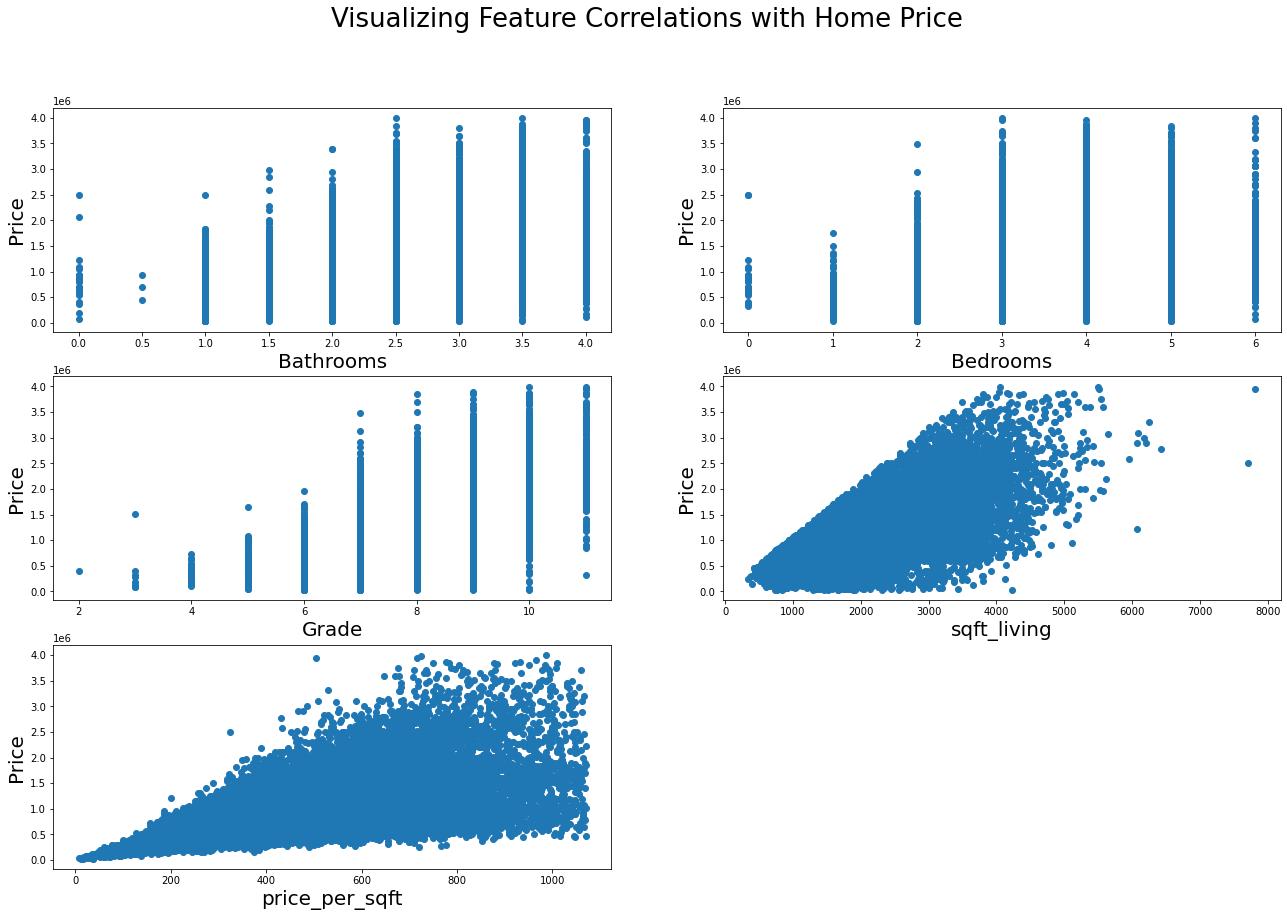

In [36]:
fig = plt.figure()
fig, axes = plt.subplots(nrows=3 ,ncols=2, figsize=(22,14))

fig.suptitle('Visualizing Feature Correlations with Home Price', fontsize=26)

axes[0][0].scatter(kc_regression_data['bathrooms'], kc_regression_data['price'])
axes[0][0].set_xlabel('Bathrooms', fontsize=20)  
axes[0][0].set_ylabel('Price', fontsize=20)  

axes[0][1].scatter(kc_regression_data['bedrooms'], kc_regression_data['price'])
axes[0][1].set_xlabel('Bedrooms', fontsize=20) 
axes[0][1].set_ylabel('Price', fontsize=20)  

axes[1][0].scatter(kc_regression_data['grade'], kc_regression_data['price'])
axes[1][0].set_xlabel('Grade', fontsize=20) 
axes[1][0].set_ylabel('Price', fontsize=20)  

axes[1][1].scatter(kc_regression_data['sqft_living'], kc_regression_data['price'])
axes[1][1].set_xlabel('sqft_living', fontsize=20) 
axes[1][1].set_ylabel('Price', fontsize=20)                          

axes[2][0].scatter(kc_regression_data['price_per_sqft'], kc_regression_data['price'])
axes[2][0].set_xlabel('price_per_sqft', fontsize=20) 
axes[2][0].set_ylabel('Price', fontsize=20)  

fig.delaxes(axes[2][1])


# Simple Feature-wise Linear Regressions 

Now that we have our predictor features choosen we will run linear regressions for each feature versus our target feature, which in this case is Price.

In order to run a proper linear regression, there are four assumptions about the data that must be taken into account and a violation of any of these 4 assumptions will cause the model to be inaccurate and therefore useless.

The 4 assumptions needed for a Linear Regression model are:

    1. There must be a linear relationship between the target variable (price) and the predictor variable
  > This will be check visually via a scatter plotting the model residuals and to assure this assumption is met statistically a Rainbow test will also be utalized 
        
    2. There must be independence of both the features and the errors in a regression
  > Feature Independence was checked earlier via the "Identifying Muliticolinear Between Features" section above and  has already been accounted for within our data
    
    3. The Residuals of the linear regression should follow a normal distribution
  > This will be checked visually via a Q-Q plot as well as statistically via a Jarque-Bera Test
  
    4. There must be homoscedasticity of errors
  >This will be checked visually via Scatterplot of model residuals and statistically via a Goldfield-Quandt Test
    
    
Thankfully we have fairly straightforward ways of testing these assumptions for each model.
Below a function has been built to run all fo the of the assumption tests described above so that a model can be easily tested

In [37]:
def model_assump_test(model_results, X, X_name, y):
    
    fig, ax = plt.subplots(ncols=3, figsize=(40,15))
    fig.suptitle('Linear Regression Assumption Testing Results for {x}'.format(x=X_name.title()), wrap=True, y=1.15, fontsize=60)

#Linearity Testing 
    #Linearity Testing via Rainbow Test
    if linear_rainbow(model_results)[1] > 0.05:
        fig.text(s=u'\u2714 Linearity Assumption passed', y=1.02, x=.4, fontsize=24)
    else:
        fig.text(s=u'\u2718 Linearity Assumption NOT passed', y=1.02, x=.4, fontsize=24)
        
    #Linearity Plot
    ax[0].scatter(x=y, y=model_results.resid)
    ax[0].axhline(y=0, color="black")
    ax[0].set_xlabel("Price", fontsize=24)
    ax[0].set_ylabel("Residuals", fontsize=24)
    ax[0].set_title("Residual Linearity Plot", fontsize=30);
        
#Normality Testing
    #Normality of Residuals test via Q-Q plot and Jarque-Bera Test
    if jarque_bera(model_results.resid)[1] > 0.05:
        fig.text(s=u'\u2714 Normality Assumption passed', y=.99, x=.4, fontsize=24)
    else:
        fig.text(s=u'\u2718 Normality Assumption NOT passed', y=.99, x=.4, fontsize=24)
    
    #Q-Q Plot generation
    sm.graphics.qqplot(model_results.resid, dist=stats.norm, line='45', fit=True, ax=ax[1])
    ax[1].set_title('Q-Q Plot of Normality', fontsize=30)
    ax[1].set_xlabel("Theoretical Quantiles",fontsize=24)
    ax[1].set_ylabel("Sample Quantiles", fontsize=24)
    
  
    ax[2].set_title('Distribution of Residuals')
    sns.histplot(model_results.resid, ax=ax[2])

 #Homoscedasticity testing 
    
#     #Extracting best fit line
#     slope = model_results.params[X_name]
#     intercept = model_results.params["const"]
#     fit_line = slope * X + intercept
#     # Plot data and lines
#     ax[2].scatter(fit_line, model_results.resid, color="purple", alpha=0.7, label="data points")
#     ax[2].set_title('Residuals Plot for Homescedasticity', fontsize=30) 
#     ax[2].set_xlabel(X_name.title(), fontsize=24)
#     ax[2].set_ylabel('Price', fontsize=24)
    
#     #Goldfeld-Quandt Test of Homoscedasticity
#     if het_goldfeldquandt(y, X, alternative='two-sided')[1] > 0.05:
#         fig.text(s=u'\u2714 Homescedasticity Assumption passed', y=.96, x=.4, fontsize=24)
#     else:
#         fig.text(s=u'\u2718 Homescedasticity Assumption NOT passed', y=.96, x=.4, fontsize=24)
    


## Baseling Model : Simple Linear Regression

In [38]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_baseline = kc_regression_data[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 2.141e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:50:52   Log-Likelihood:            -4.0555e+05
No. Observations:               28289   AIC:                         8.111e+05
Df Residuals:                   28287   BIC:                         8.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.066e+05   6516.249     16.365      0.000    9.39e+04    1.19e+05
sqft_living   434.8606      2.972    146.337      0.000     429.036     440.685
==============================================================================
Omnibus:                     2875.532   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5879.632
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       4.804   Cond. No.                     5.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of Baselinem OLS Linear Regression Model Results 


Looking at the summary above, we can extract the following information:

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The R-squared of the model explains about 32.7% of the variance in price
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values below 0.05
* If a home had 0 sqft of living space, we would expect the sale price to be about -74370
* For each increase of 1 sqft of living space, we expect to see an increase in sale price of $334.95


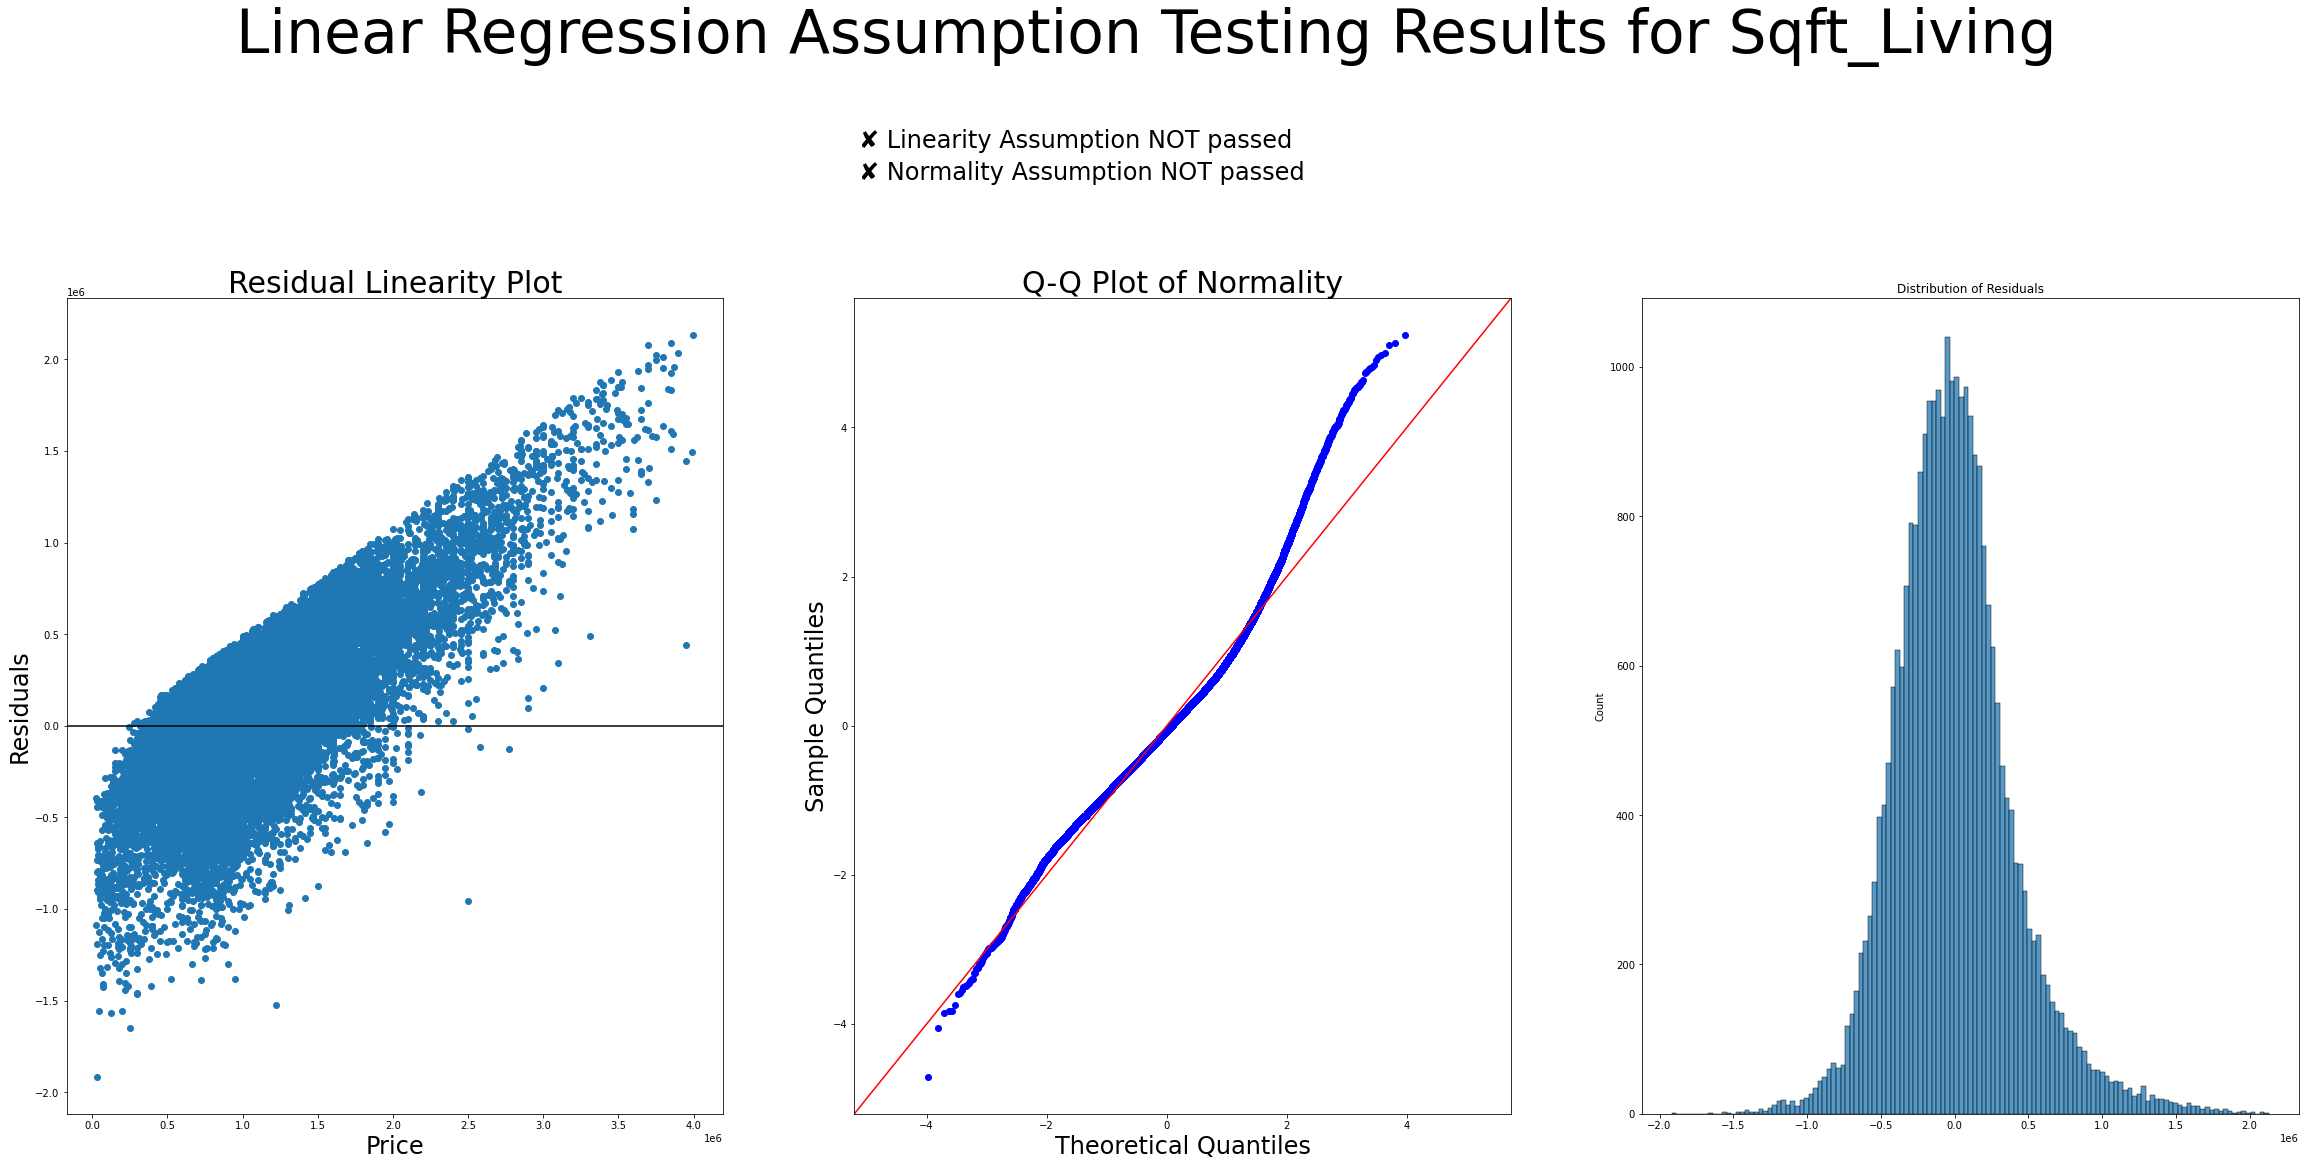

In [39]:
#Testing sqft_living Model for Linear Regression Assumptions

model_assump_test(baseline_results, X_baseline, 'sqft_living', y)


### Interpreting Linear Regression Assumption Testing Plots

In [40]:
# #log transforms

# kc_regression_data["log_sqft_living"] = np.log(kc_regression_data["sqft_living"])
# kc_regression_data["log_price"] = np.log(kc_regression_data["price"])

# y = kc_regression_data['log_price']
# X_sqft_living = kc_regression_data[["log_sqft_living"]]

# sqft_living_model = sm.OLS(y, sm.add_constant(X_sqft_living))
# sqft_living_results = sqft_living_model.fit()
# sqft_living_results.summary()

In [41]:
#model_assump_test(sqft_living_results, X_sqft_living, 'log_sqft_living', y)

# Second model


In [44]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_second_model = kc_regression_data[['sqft_living','price_per_sqft']]

second_model = sm.OLS(y, sm.add_constant(X_second_model))
second_results = second_model.fit()
second_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.559e+05
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:51:24   Log-Likelihood:            -3.7835e+05
No. Observations:               28289   AIC:                         7.567e+05
Df Residuals:                   28286   BIC:                         7.567e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.087e+06   3849.826   -282.230      0.000   -1.09e+06   -1.08e+06
sqft_living      522.0495      1.156    451.544      0.000     519.783     524.316
price_per_sqft  2026.2117      4.984    406.513      0.000    2016.442    2035.981
==============================================================================
Omnibus:                     3556.227   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26709.258
Skew:                          -0.368   Prob(JB):                         0.00
Kurtosis:                       7.703   Cond. No.                     9.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

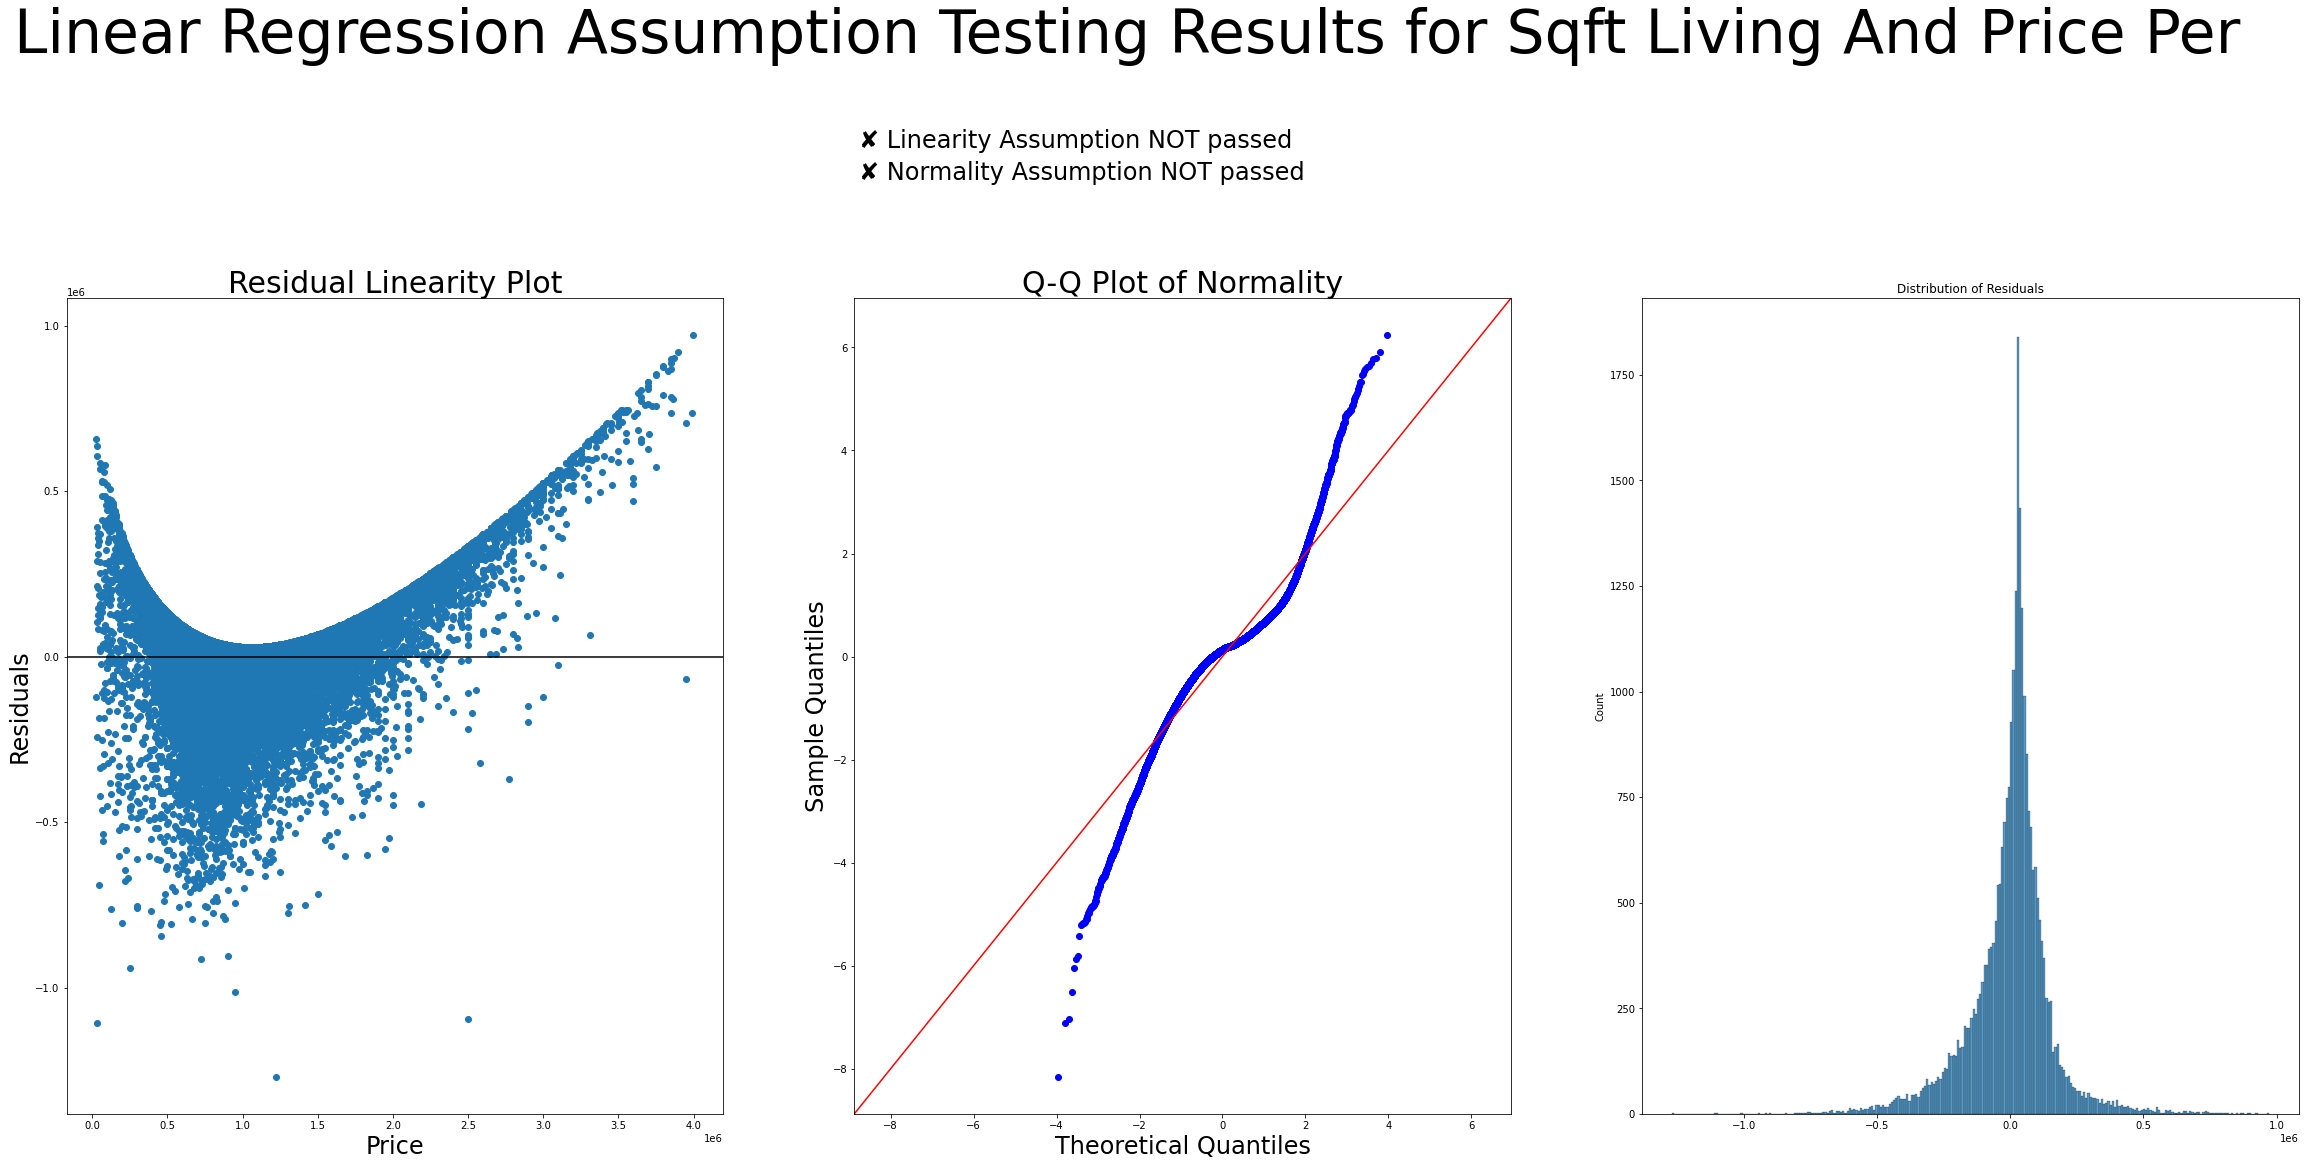

In [46]:
model_assump_test(second_results, X_second_model, 'sqft living and Price per  ', y)


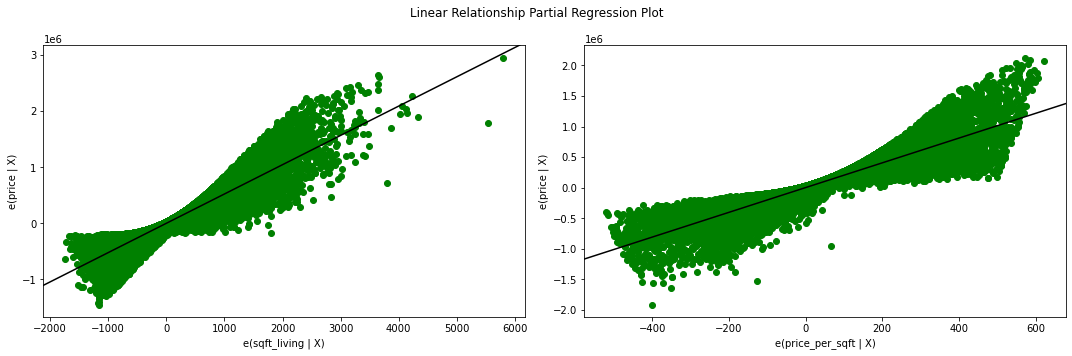

In [45]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=['sqft_living','price_per_sqft'], fig=fig)

# Customizing plot appearance; note that the StatsModels code actually uses .plot
# with marker 'o', so what looks like a scatter plot is a "line" internally, so
# we access it using .lines rather than .collections
for ax in fig.axes:
    ax.lines[0].set_color("green")
fig.suptitle("Linear Relationship Partial Regression Plot", fontsize="large")

plt.tight_layout()
plt.show()

# Third Model


In [47]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_third_model = kc_regression_data[['sqft_living', 'grade']]

third_model = sm.OLS(y, sm.add_constant(X_third_model))
third_results = third_model.fit()
third_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.364e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:51:49   Log-Likelihood:            -4.0397e+05
No. Observations:               28289   AIC:                         8.079e+05
Df Residuals:                   28286   BIC:                         8.080e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.993e+05   1.85e+04    -48.664      0.000   -9.35e+05   -8.63e+05
sqft_living   288.0188      3.790     75.986      0.000     280.589     295.448
grade         1.72e+05   2978.666     57.741      0.000    1.66e+05    1.78e+05
==============================================================================
Omnibus:                     2909.878   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6189.073
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       4.883   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

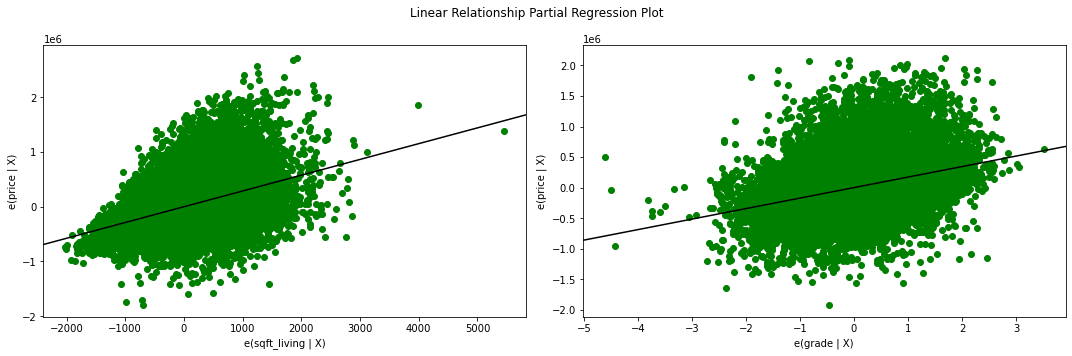

In [49]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(third_results, exog_idx=['sqft_living', 'grade'], fig=fig)

# Customizing plot appearance; note that the StatsModels code actually uses .plot
# with marker 'o', so what looks like a scatter plot is a "line" internally, so
# we access it using .lines rather than .collections
for ax in fig.axes:
    ax.lines[0].set_color("green")
fig.suptitle("Linear Relationship Partial Regression Plot", fontsize="large")

plt.tight_layout()
plt.show()

(1.0153778702124954, 0.18209223935025848)

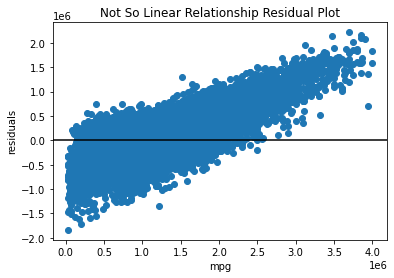

In [50]:
fig, ax = plt.subplots()

ax.scatter(y, third_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("mpg")
ax.set_ylabel("residuals")
ax.set_title("Not So Linear Relationship Residual Plot");

linear_rainbow(third_results)

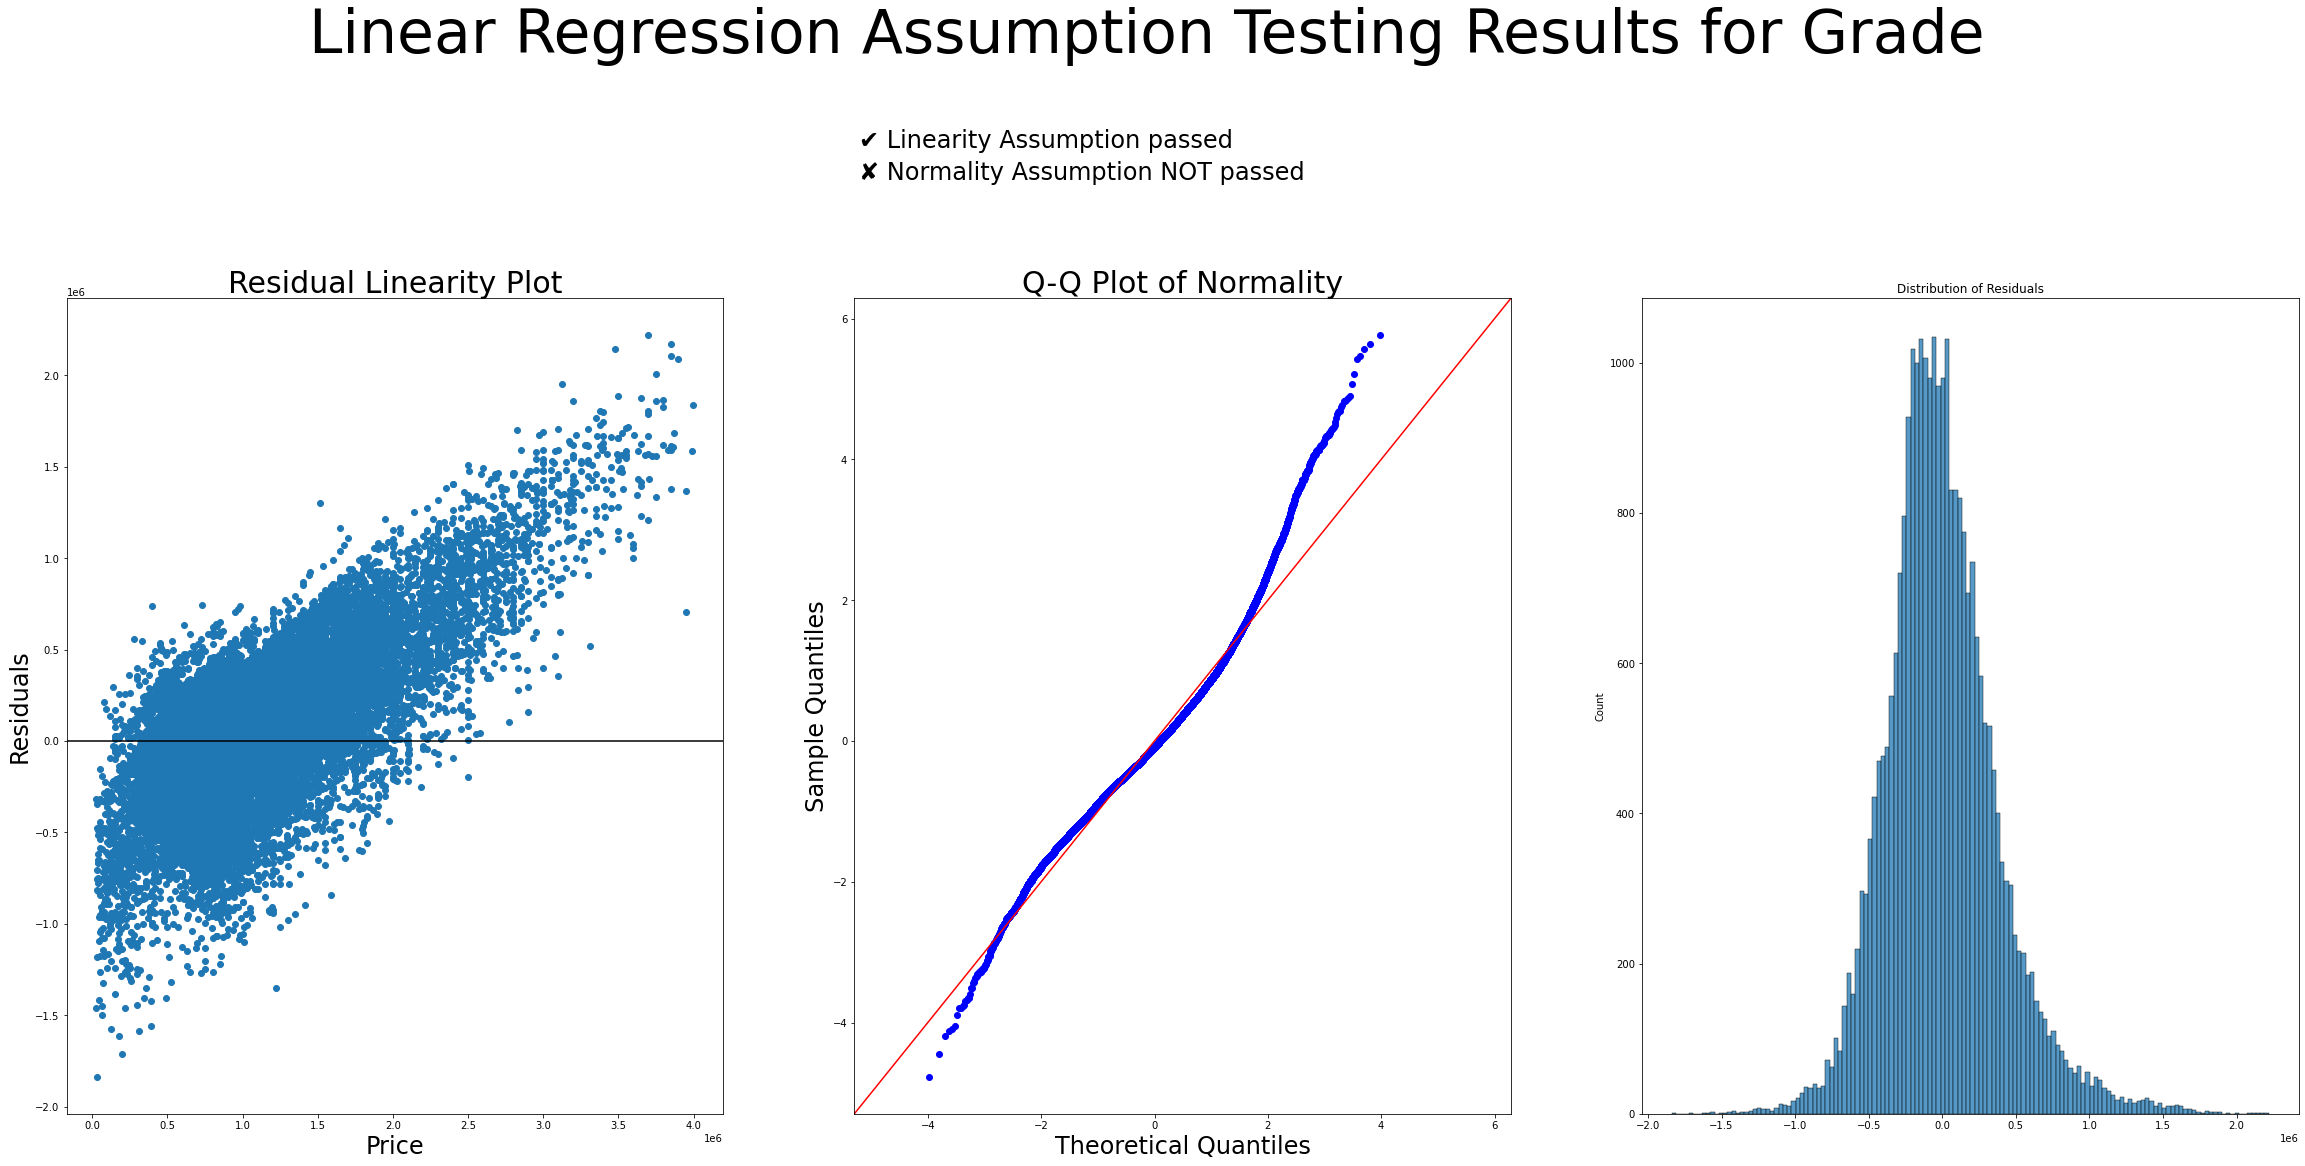

In [51]:
model_assump_test(third_results, X_third_model, 'grade',y)

### Fourth Model

In [52]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_forth_model = kc_regression_data[['sqft_living', 'grade', 'bathrooms']]

forth_model = sm.OLS(y, sm.add_constant(X_forth_model))
forth_results = forth_model.fit()
forth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     9118.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:52:45   Log-Likelihood:            -4.0395e+05
No. Observations:               28289   AIC:                         8.079e+05
Df Residuals:                   28285   BIC:                         8.079e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.997e+05   1.85e+04    -48.723      0.000   -9.36e+05   -8.64e+05
sqft_living   302.7016      4.414     68.575      0.000     294.050     311.354
grade        1.766e+05   3061.571     57.694      0.000    1.71e+05    1.83e+05
bathrooms   -2.856e+04   4408.737     -6.477      0.000   -3.72e+04   -1.99e+04
==============================================================================
Omnibus:                     2888.055   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6202.697
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       4.896   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_forth_model = kc_regression_data[['sqft_living', 'grade', 'bedrooms']]

forth_model = sm.OLS(y, sm.add_constant(X_forth_model))
forth_results = forth_model.fit()
forth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9162.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:52:57   Log-Likelihood:            -4.0392e+05
No. Observations:               28289   AIC:                         8.078e+05
Df Residuals:                   28285   BIC:                         8.079e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.013e+05   2.07e+04    -38.722      0.000   -8.42e+05   -7.61e+05
sqft_living   316.2157      4.648     68.029      0.000     307.105     325.327
grade        1.669e+05   3013.019     55.387      0.000    1.61e+05    1.73e+05
bedrooms    -3.457e+04   3310.784    -10.441      0.000   -4.11e+04   -2.81e+04
==============================================================================
Omnibus:                     2882.384   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6160.687
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       4.886   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Fifth Model

In [54]:
y = kc_regression_data['price']
X_fifth_model = kc_regression_data.drop(['price', 'price_per_sqft'], axis=1)


fifth_model = sm.OLS(y, sm.add_constant(X_fifth_model))
fifth_results = fifth_model.fit()
fifth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1840.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:53:18   Log-Likelihood:            -4.0298e+05
No. Observations:               28289   AIC:                         8.060e+05
Df Residuals:                   28271   BIC:                         8.061e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.144e+06   2.36e+04    -48.522      0.000   -1.19e+06    -1.1e+06
bedrooms       -3.081e+04   3347.753     -9.203      0.000   -3.74e+04   -2.42e+04
bathrooms       7198.1891   4570.115      1.575      0.115   -1759.456    1.62e+04
sqft_living      311.3880      5.067     61.460      0.000     301.457     321.319
sqft_lot          -0.0597      0.045     -1.323      0.186      -0.148       0.029
floors         -5.911e+04   4813.808    -12.278      0.000   -6.85e+04   -4.97e+04
condition           7e+04   3321.963     21.071      0.000    6.35e+04    7.65e+04
grade           2.069e+05   3331.007     62.110      0.000       2e+05    2.13e+05
sqft_garage     -209.8082      9.791    -21.428      0.000    -229.000    -190.617
sqft_patio        46.8788     11.724      3.999      0.000      23.899      69.858
has_patio      -3.087e+04   6210.311     -4.971      0.000    -4.3e+04   -1.87e+04
greenbelt       9.814e+04   1.44e+04      6.827      0.000       7e+04    1.26e+05
waterfront      1.553e+04    2.3e+04      0.674      0.500   -2.96e+04    6.07e+04
nuisance        2.637e+04   5980.864      4.408      0.000    1.46e+04    3.81e+04
view_AVERAGE    7.794e+04   9543.600      8.167      0.000    5.92e+04    9.67e+04
view_EXCELLENT  2.959e+05   2.26e+04     13.094      0.000    2.52e+05     3.4e+05
view_FAIR       1.957e+05   2.71e+04      7.217      0.000    1.43e+05    2.49e+05
view_GOOD       1.262e+05   1.44e+04      8.765      0.000    9.79e+04    1.54e+05
==============================================================================
Omnibus:                     2801.526   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6847.482
Skew:                           0.590   Prob(JB):                         0.00
Kurtosis:                       5.101   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sixth Model

In [55]:
y = kc_regression_data['price']
X_sixth_model = kc_regression_data.drop(['price', 'price_per_sqft','waterfront','sqft_lot'], axis=1)


sixth_model = sm.OLS(y, sm.add_constant(X_sixth_model))
sixth_results = sixth_model.fit()
sixth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2085.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:53:27   Log-Likelihood:            -4.0298e+05
No. Observations:               28289   AIC:                         8.060e+05
Df Residuals:                   28273   BIC:                         8.061e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.145e+06   2.34e+04    -48.925      0.000   -1.19e+06    -1.1e+06
bedrooms       -3.057e+04   3334.844     -9.166      0.000   -3.71e+04    -2.4e+04
bathrooms       7495.1239   4563.970      1.642      0.101   -1450.475    1.64e+04
sqft_living      310.5849      5.020     61.865      0.000     300.745     320.425
floors          -5.88e+04   4809.218    -12.227      0.000   -6.82e+04   -4.94e+04
condition           7e+04   3321.104     21.078      0.000    6.35e+04    7.65e+04
grade            2.07e+05   3319.441     62.351      0.000       2e+05    2.13e+05
sqft_garage     -210.5670      9.776    -21.539      0.000    -229.729    -191.405
sqft_patio        45.0804     11.591      3.889      0.000      22.362      67.799
has_patio      -3.052e+04   6203.601     -4.921      0.000   -4.27e+04   -1.84e+04
greenbelt       9.863e+04   1.44e+04      6.864      0.000    7.05e+04    1.27e+05
nuisance        2.612e+04   5978.491      4.370      0.000    1.44e+04    3.78e+04
view_AVERAGE    7.833e+04   9486.883      8.257      0.000    5.97e+04    9.69e+04
view_EXCELLENT   3.02e+05   2.06e+04     14.638      0.000    2.62e+05    3.42e+05
view_FAIR       1.964e+05   2.71e+04      7.244      0.000    1.43e+05    2.49e+05
view_GOOD       1.267e+05   1.42e+04      8.915      0.000    9.88e+04    1.55e+05
==============================================================================
Omnibus:                     2807.497   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6872.749
Skew:                           0.591   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Confused why:
why adding a patio would subtract -7955  
why adding a bedroom would be less value
why adding a floor would be less value

## Seventh Model

In [56]:
y = kc_regression_data['price']
X_sixth_model = kc_regression_data.drop(['price', 'price_per_sqft','waterfront','sqft_lot',
                                        'has_patio', 'bedrooms', 'floors'], axis=1)


sixth_model = sm.OLS(y, sm.add_constant(X_sixth_model))
sixth_results = sixth_model.fit()
sixth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2563.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:53:34   Log-Likelihood:            -4.0311e+05
No. Observations:               28289   AIC:                         8.062e+05
Df Residuals:                   28276   BIC:                         8.063e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.233e+06   2.18e+04    -56.529      0.000   -1.28e+06   -1.19e+06
bathrooms      -1.722e+04   4306.870     -3.999      0.000   -2.57e+04   -8783.014
sqft_living      295.1343      4.474     65.959      0.000     286.364     303.905
condition       7.853e+04   3224.502     24.355      0.000    7.22e+04    8.49e+04
grade            1.98e+05   3096.905     63.948      0.000    1.92e+05    2.04e+05
sqft_garage     -190.6972      9.675    -19.710      0.000    -209.661    -171.733
sqft_patio        27.9733     10.436      2.680      0.007       7.517      48.429
greenbelt        9.59e+04   1.44e+04      6.649      0.000    6.76e+04    1.24e+05
nuisance        2.822e+04   6000.740      4.702      0.000    1.65e+04       4e+04
view_AVERAGE     8.99e+04   9493.653      9.470      0.000    7.13e+04    1.09e+05
view_EXCELLENT  3.307e+05   2.06e+04     16.026      0.000     2.9e+05    3.71e+05
view_FAIR       2.107e+05   2.72e+04      7.745      0.000    1.57e+05    2.64e+05
view_GOOD       1.461e+05   1.42e+04     10.281      0.000    1.18e+05    1.74e+05
==============================================================================
Omnibus:                     2902.387   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6913.740
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                       5.084   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
y = kc_regression_data['price']
X_sixth_model = kc_regression_data.drop(['price', 'price_per_sqft','waterfront','sqft_lot',
                                        'has_patio', 'bedrooms', 'floors','sqft_garage','bathrooms'], axis=1)


sixth_model = sm.OLS(y, sm.add_constant(X_sixth_model))
sixth_results = sixth_model.fit()
sixth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2989.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:53:36   Log-Likelihood:            -4.0332e+05
No. Observations:               28289   AIC:                         8.067e+05
Df Residuals:                   28278   BIC:                         8.067e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.161e+06   2.17e+04    -53.573      0.000    -1.2e+06   -1.12e+06
sqft_living      265.5251      3.826     69.404      0.000     258.026     273.024
condition       7.852e+04   3248.006     24.174      0.000    7.22e+04    8.49e+04
grade           1.828e+05   2984.868     61.240      0.000    1.77e+05    1.89e+05
sqft_patio        24.2822     10.508      2.311      0.021       3.686      44.879
greenbelt       7.834e+04   1.45e+04      5.402      0.000    4.99e+04    1.07e+05
nuisance        4.419e+04   5992.310      7.375      0.000    3.24e+04    5.59e+04
view_AVERAGE    1.047e+05   9536.240     10.978      0.000     8.6e+04    1.23e+05
view_EXCELLENT  3.584e+05   2.07e+04     17.280      0.000    3.18e+05    3.99e+05
view_FAIR       2.274e+05   2.74e+04      8.301      0.000    1.74e+05    2.81e+05
view_GOOD        1.68e+05   1.43e+04     11.771      0.000     1.4e+05    1.96e+05
==============================================================================
Omnibus:                     2905.330   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6742.338
Skew:                           0.625   Prob(JB):                         0.00
Kurtosis:                       5.038   Cond. No.                     2.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature 2: Bedrooms

In [ ]:
kc_regression_data

In [58]:
#Creating a simple linear regression of bedrooms vs price

y = kc_working_data['price']
X_bedrooms = kc_working_data.drop(columns=['price'])


bedrooms_model = sm.OLS(y, sm.add_constant(X_bedrooms))
bedrooms_results = bedrooms_model.fit()
bedrooms_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:58:16   Log-Likelihood:            -3.7790e+05
No. Observations:               28289   AIC:                         7.558e+05
Df Residuals:                   28270   BIC:                         7.560e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.282e+06   9723.712   -131.817      0.000    -1.3e+06   -1.26e+06
bedrooms        1.301e+04   1384.724      9.397      0.000    1.03e+04    1.57e+04
bathrooms       1.397e+04   1883.551      7.417      0.000    1.03e+04    1.77e+04
sqft_living      479.4967      2.136    224.435      0.000     475.309     483.684
sqft_lot          -0.0323      0.019     -1.734      0.083      -0.069       0.004
floors         -1.695e+04   1987.133     -8.531      0.000   -2.08e+04   -1.31e+04
condition       1.161e+04   1378.047      8.428      0.000    8913.631    1.43e+04
grade           2.986e+04   1453.059     20.546      0.000     2.7e+04    3.27e+04
sqft_garage        3.6748      4.076      0.902      0.367      -4.314      11.664
sqft_patio        -8.6768      4.834     -1.795      0.073     -18.152       0.798
price_per_sqft  1987.6761      5.347    371.724      0.000    1977.195    1998.157
has_patio      -7229.9703   2560.221     -2.824      0.005   -1.22e+04   -2211.815
greenbelt       1.454e+04   5928.305      2.453      0.014    2924.186    2.62e+04
waterfront      8295.8410   9495.750      0.874      0.382   -1.03e+04    2.69e+04
nuisance        1836.3537   2465.752      0.745      0.456   -2996.639    6669.347
view_AVERAGE    3228.2048   3938.298      0.820      0.412   -4491.048    1.09e+04
view_EXCELLENT  9.198e+04   9329.605      9.859      0.000    7.37e+04     1.1e+05
view_FAIR       3.135e+04   1.12e+04      2.804      0.005    9433.263    5.33e+04
view_GOOD        2.94e+04   5937.118      4.952      0.000    1.78e+04     4.1e+04
==============================================================================
Omnibus:                     3097.125   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25097.791
Skew:                          -0.204   Prob(JB):                         0.00
Kurtosis:                       7.596   Cond. No.                     6.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Testing bedrooms Model for Linear Regression Assumptions

model_assump_test(bedrooms_results, X_bedrooms, 'bedrooms', y)

In [ ]:
y = kc_regression_data['price']
X_bedrooms = kc_regression_data[["bedrooms"]]

bedrooms_model = sm.OLS(y, sm.add_constant(X_bedrooms))
bedrooms_results = bedrooms_model.fit()
bedrooms_results.summary()

# Needs to be fixed
### Simple Linear Regression Results

Looking at the summary above, we can see that the regression line we found was

$$ \hat{saleprice} = -834900 - 559.97 (sqft\_living) $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 37% of the variance in sales price
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values below 0.05
* If a home had 0 sqft of living space, we would expect the sale price to be about -74370
* For each increase of 1 sqft of living space, we expect to see an increase in sale price of $559.97


Normality failed, to address this the log transformations will be applied to the data